# Figure for the 3d triangulation

### General tools

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LightSource
from matplotlib.tri import Triangulation
from itertools import product

In [2]:
r = 9.7
outer_r = 11 # This isn't all that necessary any more.
true_col = np.array([0.9,0.9,0.9,0.9])
c = np.array([0.8,0.8,0.9,1.0])
true_ec = np.array([0.5,0.5,0.9,1.0])
ec = np.array([0.5,0.5,0.5,1.0])

In [3]:
def in_u(x,y):
    # Checks if a point is in an elipse.
    a = 1
    b = 1
    if x*x/a + y*y/b < r*r:
        return True
    else:
        return False

def in_extended_u(x,y):
    # Checks if a point is in an elipse.
    a = 1
    b = 1
    if x*x/a + y*y/b < outer_r*outer_r:
        return True
    else:
        return False

def phi(x,y):
    f1 = 0.4
    f2 = -0.3
    phase1 = 0
    phase2 = 1
    h = -0.75
    return h*(np.sin(f1*(x + phase1*np.pi)) + np.sin(f2*(y + phase2*np.pi)))

### Plotting the "true" surface

In [ ]:
# Create a grid inside U
x = np.linspace(-outer_r,outer_r,num=1000)
y = np.linspace(-outer_r,outer_r,num=1000)
x, y = np.meshgrid(x,y)

In [ ]:
heights = np.empty_like(x)
for i in range(heights.shape[0]):
    for j in range(heights.shape[1]):
        heights[i,j] = phi(x[i,j],y[i,j])
#print(heights.shape)

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
blue = np.array([0.0, 0.0, 1.0])
rgb = np.tile(blue, (heights.shape[0], heights.shape[1], 1))
ls = LightSource(azdeg=315, altdeg = 45)
#illuminated_surface = ls.shade_rgb(rgb,heights,fraction=1.0)
ax.set_axis_off()
for i in range(heights.shape[0]):
    for j in range(heights.shape[1]):
        if not in_u(x[i,j],y[i,j]):
            heights[i,j] = np.nan
ax.plot_surface(x, y, heights, linewidth=0.2,antialiased=False,
                color=true_col,edgecolor=ec) #,facecolors=illuminated_surface)
ax.set_aspect("equal")
fig.savefig("true-surface.pdf",bbox_inches="tight")

### Triangulated surface

We now want quite a coarse grid inside U, and triangles based on that grid.

Actually I could produce both figures with this code: take a large $n$ for the "true" surface, and a small one for the triangulated surface.

In [7]:
n = 12
x = np.linspace(-outer_r,outer_r,num=n)
y = np.linspace(-outer_r,outer_r,num=n)
x,y = np.meshgrid(x,y)
gridx = np.ravel(x)
gridy = np.ravel(y)
triangles = []
for i in range(n-1):
    for j in range(n-1):
        triangles.append( (i + j*n, i + (j+1)*n, i + j*n + 1) )
        triangles.append( (i + j*n + 1, i + (j+1)*n, i + (j+1)*n + 1) )
# Now we remove the points and triangles which are outside of U.
# First we check which points are in U.
points_in_U = [False]*(n*n)
for i in range(n):
    for j in range(n):
        x = gridx[i + j*n]
        y = gridy[i + j*n]
        points_in_U[i+j*n] = in_u(x,y)
# Then we check which triangles are entirely in U.
masked_triangles = [True]*len(triangles)
for k, t in enumerate(triangles):
    t1,t2,t3 = t
    if points_in_U[t1] and points_in_U[t2] and points_in_U[t3]:
        masked_triangles[k] = False
# I think we can then use triangles_in_U as a mask:
triangulation = Triangulation(gridx,gridy,triangles=triangles,mask=masked_triangles)

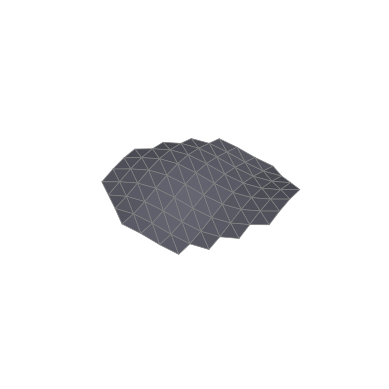

In [8]:
offset = 0
heights = np.empty_like(gridx)
for k in range(len(gridx)):
    heights[k] = phi(gridx[k],gridy[k]) - offset
#blue = np.array([0.0, 0.0, 1.0])
#full_heights = np.empty_like(x)
#for i in range(n):
#    for j in range(n):
#        full_heights[i,j] = phi(x[i,j],y[i,j])
#rgb = np.tile(blue, (full_heights.shape[0],full_heights.shape[1],1))
ls = LightSource(azdeg=315,altdeg=45)
#illuminated_surface = ls.shade_rgb(rgb,full_heights)
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.set_axis_off()
ax.plot_trisurf(triangulation,heights,lightsource=ls,color=c,edgecolor=ec,linewidth=0.5)
ax.set_aspect("equal")
fig.savefig("triangulated-surface.eps",bbox_inches="tight")

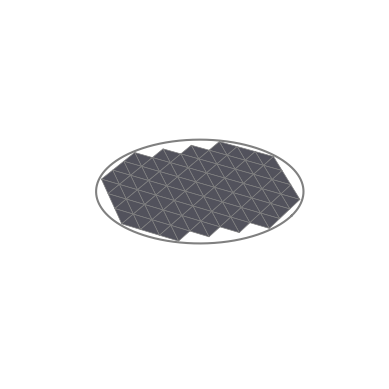

In [9]:
flatheights = np.zeros(gridx.shape)
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.set_axis_off()
ax.plot_trisurf(triangulation,flatheights,lightsource=ls,color=c,edgecolor=ec,linewidth=0.5)
# Now we draw the boundary of the ellipse.
theta = np.linspace(0,2*np.pi,1000)
z = np.zeros(1000)
x = r * np.cos(theta)
y = r * np.sin(theta)
ax.plot(x,y,z,color=ec)
ax.set_aspect("equal")
fig.savefig("flat-grid.eps",bbox_inches="tight")

## Everything together

In [5]:
true_facecolor = (0.9,0.9,0.9,0.5)
true_edgecolor = (0.0,0.0,0.0,1.0)
tri_facecolor = (0.9,0.9,1.0,1.0)
tri_edgecolor = (0.5,0.5,0.5,1.0)
flat_facecolor = (0.8,0.8,0.9,1.0)
flat_edgecolor = (0.5,0.5,0.5,1.0)

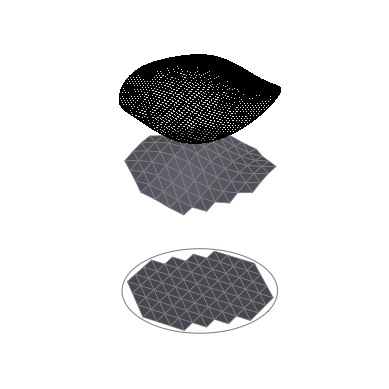

In [17]:
offset = 10
flat_offset = 18
n = 12

# Create a grid inside U
x = np.linspace(-outer_r,outer_r,num=1000)
y = np.linspace(-outer_r,outer_r,num=1000)
x, y = np.meshgrid(x,y)

heights = np.empty_like(x)
for i in range(heights.shape[0]):
    for j in range(heights.shape[1]):
        heights[i,j] = phi(x[i,j],y[i,j])
#print(heights.shape)

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
blue = np.array([0.0, 0.0, 1.0])
rgb = np.tile(blue, (heights.shape[0], heights.shape[1], 1))
ls = LightSource(azdeg=315, altdeg = 45)
#illuminated_surface = ls.shade_rgb(rgb,heights,fraction=1.0)
for i in range(heights.shape[0]):
    for j in range(heights.shape[1]):
        if not in_u(x[i,j],y[i,j]):
            heights[i,j] = np.nan
ax.plot_surface(x, y, heights, linewidth=0.2,antialiased=False,
                color=true_facecolor,edgecolor=true_edgecolor) #,facecolors=illuminated_surface)

x = np.linspace(-outer_r,outer_r,num=n)
y = np.linspace(-outer_r,outer_r,num=n)
x,y = np.meshgrid(x,y)
gridx = np.ravel(x)
gridy = np.ravel(y)
triangles = []
for i in range(n-1):
    for j in range(n-1):
        triangles.append( (i + j*n, i + (j+1)*n, i + j*n + 1) )
        triangles.append( (i + j*n + 1, i + (j+1)*n, i + (j+1)*n + 1) )
# Now we remove the points and triangles which are outside of U.
# First we check which points are in U.
points_in_U = [False]*(n*n)
for i in range(n):
    for j in range(n):
        x = gridx[i + j*n]
        y = gridy[i + j*n]
        points_in_U[i+j*n] = in_u(x,y)
# Then we check which triangles are entirely in U.
masked_triangles = [True]*len(triangles)
for k, t in enumerate(triangles):
    t1,t2,t3 = t
    if points_in_U[t1] and points_in_U[t2] and points_in_U[t3]:
        masked_triangles[k] = False
# I think we can then use triangles_in_U as a mask:
triangulation = Triangulation(gridx,gridy,triangles=triangles,mask=masked_triangles)

heights = np.empty_like(gridx)
for k in range(len(gridx)):
    heights[k] = phi(gridx[k],gridy[k]) - offset
#blue = np.array([0.0, 0.0, 1.0])
#full_heights = np.empty_like(x)
#for i in range(n):
#    for j in range(n):
#        full_heights[i,j] = phi(x[i,j],y[i,j])
#rgb = np.tile(blue, (full_heights.shape[0],full_heights.shape[1],1))
ls = LightSource(azdeg=315,altdeg=60)
#illuminated_surface = ls.shade_rgb(rgb,full_heights)
ax.plot_trisurf(triangulation,heights,lightsource=ls,
                color=tri_facecolor,edgecolor=tri_edgecolor,linewidth=0.5)


flatheights = np.zeros(gridx.shape) - offset - flat_offset
ax.plot_trisurf(triangulation,flatheights,lightsource=ls,color=flat_facecolor,edgecolor=flat_edgecolor,linewidth=0.5)
# Now we draw the boundary of the ellipse.
theta = np.linspace(0,2*np.pi,1000)
z = np.zeros(1000) - offset - flat_offset
x = 1.02*r * np.cos(theta)
y = 1.02*r * np.sin(theta)
ax.plot(x,y,z,color=flat_edgecolor,linewidth=0.75)


ax.set_aspect("equal")
ax.set_axis_off()
fig.savefig("combined.pdf",bbox_inches="tight")